<a href="https://colab.research.google.com/github/dajuctech/Applied-AI-Course/blob/main/Time%20Series%20Analysis/ChangePoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Changepoints**

This notebook contains practical examples and exercises for the Applied AI-Time Series - Changepoints topic. It is adapted from [this tutorial](https://medium.com/dataman-in-ai/finding-the-change-points-in-a-time-series-95a308207012).

**Importing Libraries**

In [1]:
!pip install numpy pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

**Explanation:**

* Libraries are imported to handle various tasks:
    * pandas: To create and manipulate time series data.
    * numpy: For numerical operations like generating random values.
    * matplotlib.pyplot: To visualize the time series data.
    * random: Provides randomization functions (not used in this code).

**Reason:**
We need these libraries to generate synthetic time series data, manipulate it, and plot results to visualize change points.

**Generating a Random Time Series**

In [3]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate a random time series with 1000 data points
signal = pd.Series(np.random.normal(0, 1, 1000), index=pd.date_range('2022-01-01', periods=1000, freq='D'))

# Add some abrupt changes to the time series
signal.loc['2022-02-05':'2022-02-15'] -= 5
signal.loc['2022-03-10':'2022-03-20'] += 3.5
signal.loc['2022-04-05':'2022-04-08'] -= 4

**Explanation:**

1. Set a random seed:
This ensures that random numbers are generated in a reproducible manner.

2. Generate a time series:
A time series with 1000 daily data points is created, with values drawn from a normal distribution (mean = 0, std = 1).

3. Introduce abrupt changes:

* Between 2022-02-05 and 2022-02-15, values are decreased by 5.
* Between 2022-03-10 and 2022-03-20, values are increased by 3.5.
* Between 2022-04-05 and 2022-04-08, values are decreased by 4.

**Reason:**
This simulates sudden changes in data, similar to events like financial crashes or sensor malfunctions. Detecting such points is the goal of change point analysis.

**Plotting the Time Series**

Let's generate a graphical representation of the result.

**Define the detect_abrupt_changes function**

In [4]:
def detect_abrupt_changes(signal, threshold, window_size):
    """
    Detects abrupt changes in a time series based on threshold and window size.

    Parameters:
    - signal: numpy array or pandas Series containing the time series data
    - threshold: float, the threshold value for detecting a significant change
    - window_size: int, the number of steps to compare changes

    Returns:
    - changes: numpy array of 0s and 1s, where 1 indicates an abrupt change
    """
    changes = np.zeros_like(signal)

    for i in range(window_size, len(signal)):
        window_diff = abs(signal[i] - signal[i - window_size])
        if window_diff > threshold:
            changes[i] = 1

    return changes

<ipython-input-4-2a6553f3b306>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  window_diff = abs(signal[i] - signal[i - window_size])


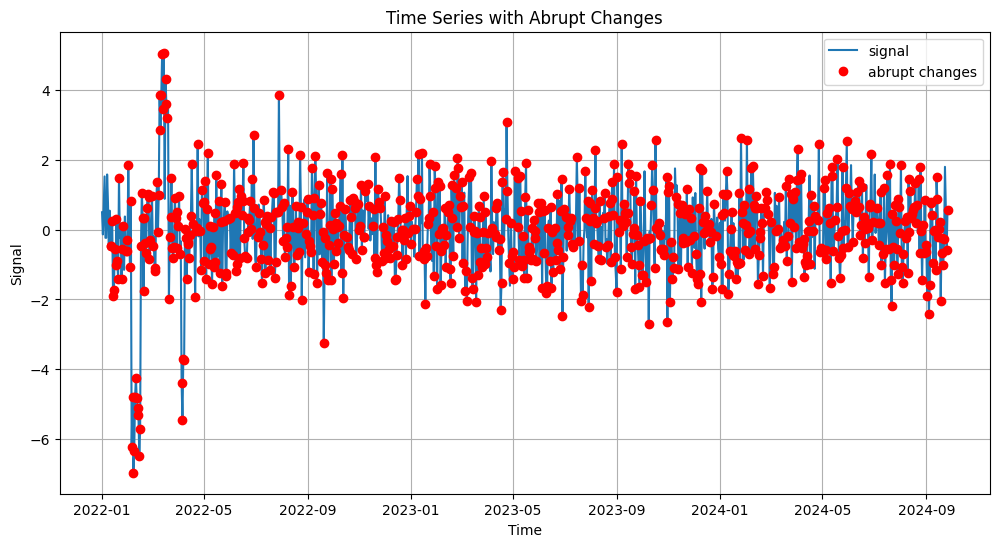

In [5]:
# Plot the time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
abrupt_changes = detect_abrupt_changes(signal, 0.3, 10)
abrupt_changes = abrupt_changes.astype(int)
ax.plot(signal[abrupt_changes==1], 'ro', label='abrupt changes')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

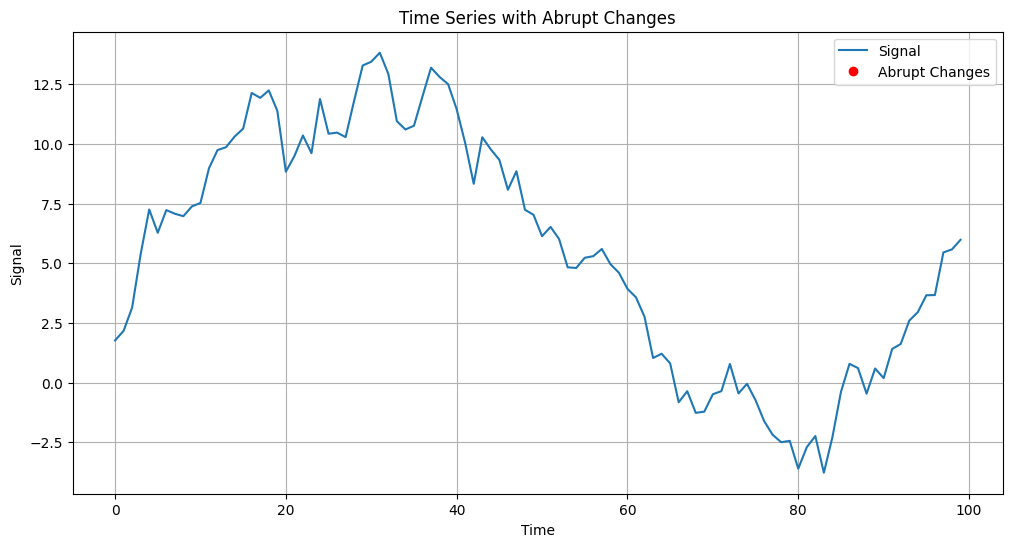

In [6]:
#Main Code
# Simulated time series data for demonstration
np.random.seed(0)
signal = np.cumsum(np.random.randn(100))  # Cumulative sum of random noise

# Detect abrupt changes in the time series
abrupt_changes = detect_abrupt_changes(signal, threshold=10, window_size=5)

# Plot the time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='Signal')

# Plot the abrupt changes
ax.plot(np.where(abrupt_changes == 1)[0], signal[abrupt_changes == 1], 'ro', label='Abrupt Changes')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

**Explanation:**

1. Create a plot:
The time series (signal) is plotted.

2. Detect and plot changes:
The code assumes a function detect_abrupt_changes() is used to identify abrupt changes. Detected points are plotted as red dots ('ro').

3. Add labels:
X-axis, Y-axis, and a title are added for clarity. A grid and legend improve readability.

**Reason:**

Visualizing the time series helps confirm if changes were detected correctly by the algorithm.

# **Generate Two Time Series**

*   The first time series “ts1”: Has ten data segments with constant variance.
*   The second time series “ts2”: has ten data segments but with varying variances.

**Offline — The Ruptures Module**

**Constant Variance Series**

In time series modeling we try to find the underlying pattern such as a regression line so we can forecast the future. But the regression line will not be straight if there are change points. So an intuitive algorithm is to build segmented regression lines where the kinked points are the change points. This method is called Pruned Exact Linear Time (PELT) [3], [4].

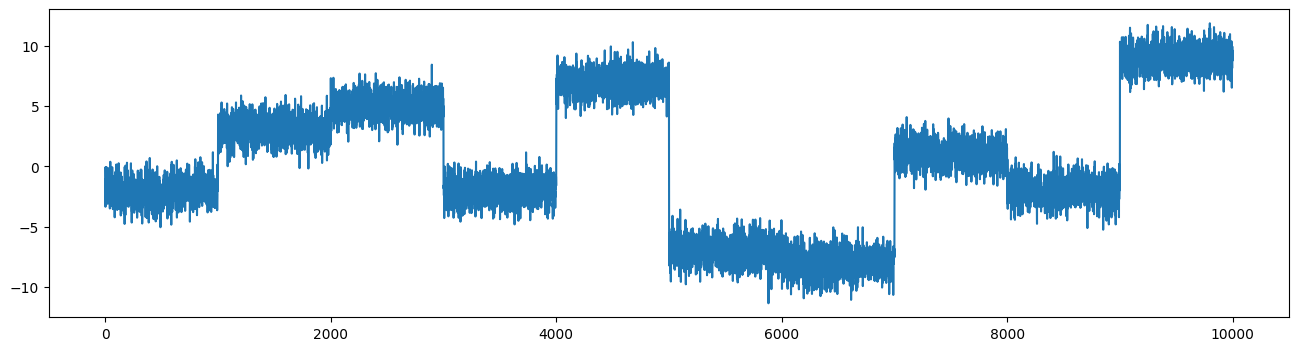

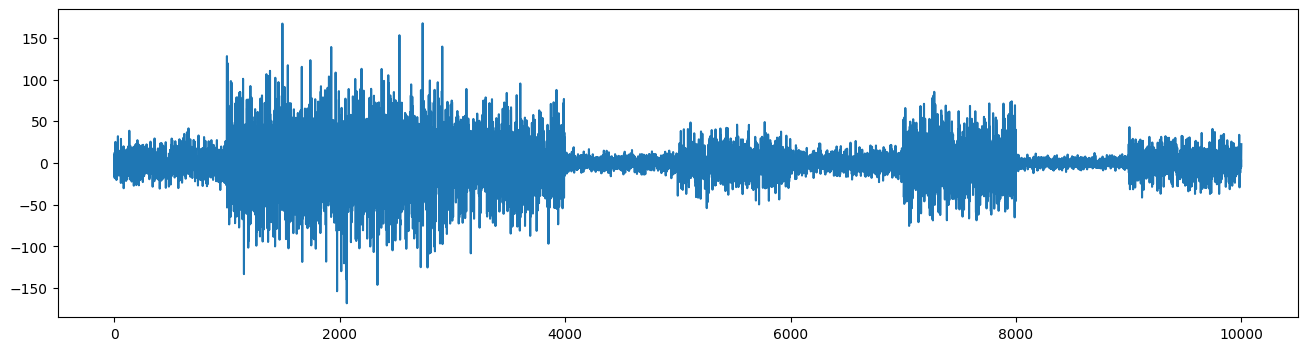

In [7]:
# Example 1: contant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts1)

# Example 2: varying variance
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg)
    ts2 = np.append(ts2,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts2)

**Explanation:**

1. Generate synthetic data:

* A time series (ts1) with 10 segments, each containing 1000 points, is created.
* The data for each segment follows a normal distribution but is offset by a random value to simulate different means across segments.

**Plot the data:**

The generated series is displayed.

**Reason:**

This series simulates constant variance with abrupt mean shifts between segments. It allows us to evaluate change point detection.


**1.   Example E.1 — constant variance**







   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


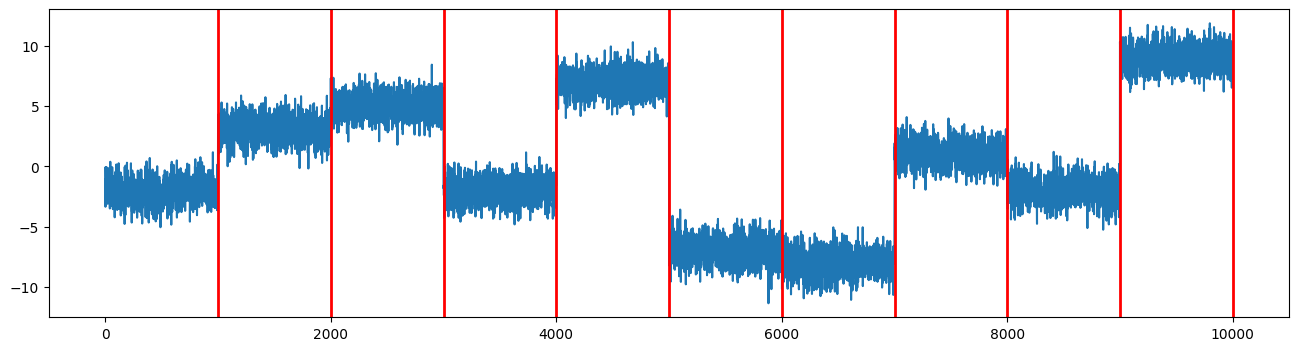

In [8]:
!pip install ruptures
import ruptures as rpt

# Detect the change points
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)

# Point the change points:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

plot_change_points(ts1,change_location1)

This is nice. It has detected all the ten change points that we have generated. Let’s see if it is still effective when the variance varies over time.

**Varying Variance Series**

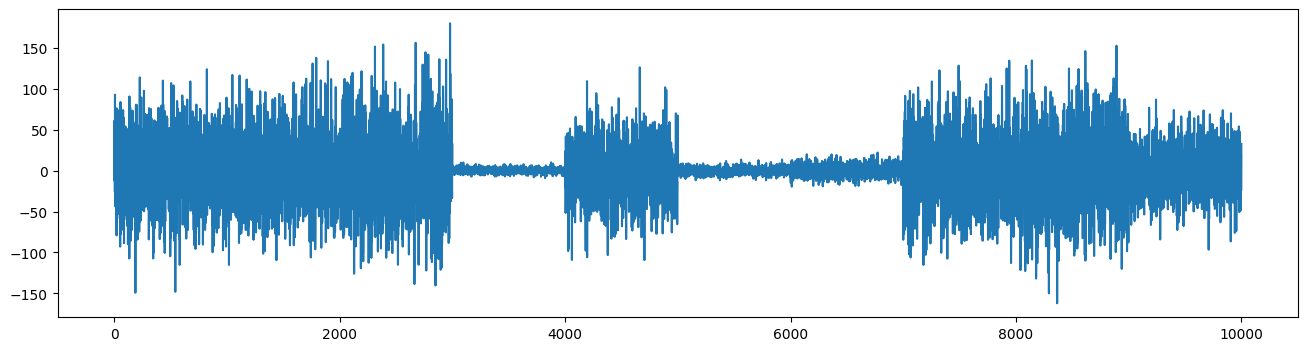

In [9]:
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg)
    ts2 = np.append(ts2, ts, axis=0)

plt.figure(figsize=(16, 4))
plt.plot(ts2)


**Explanation:**

1. Generate synthetic data with varying variance:

* Each segment's variance is adjusted by multiplying the standard deviation (sigma) by a random value.
* This creates a series with high and low variance regions.

2. Plot the data:
The time series with varying variance is displayed.

**Reason:**

This series is more complex, simulating real-world scenarios where variance (e.g., volatility in stock prices) changes over time.


**2.   Example E.2 —varying variance**



**Change Point Detection (Varying Variance)**

In [ ]:
# detect the change points #
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

# Plot the change points #
plot_change_points(ts2,change_location2)

**Explanation:**

1. Apply the algorithm:
The PELT algorithm detects change points in the series with varying variance.

2. Plot the result:
The red lines indicate detected change points.

**Reason:**
The algorithm is tested under more challenging conditions, where both mean and variance change. It shows that detecting changes under these conditions may take longer and require more tuning.

The algorithm needs a long runtime to find the change points in Example 1.1 and especially Example 1.2. This may not meet the requirement for real-time streaming data. Therefore the Python module [“changefinder”](https://https://medium.com/dataman-in-ai/finding-the-change-points-in-a-time-series-95a308207012) is designed for real-time applications.

**Detecting Change Points with Ruptures**

In [ ]:
!pip install ruptures
import ruptures as rpt


**Explanation:**

* The ruptures library provides algorithms for offline change point detection.
* The code installs the library and imports it.

**Reason:**

We use ruptures to detect points where the time series properties (mean or variance) change significantly

**Change Point Detection (Constant Variance)**

In [ ]:
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)

def plot_change_points(ts, ts_change_loc):
    plt.figure(figsize=(16, 4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x, lw=2, color='red')

plot_change_points(ts1, change_location1)


**Explanation:**

1. Apply the PELT algorithm:

* PELT (Pruned Exact Linear Time) is an efficient algorithm for detecting multiple change points.
* The model="rbf" parameter uses a Radial Basis Function to calculate the similarity between data points.
* The pen=10 parameter sets a penalty for adding additional change points.

2. Plot detected points:
The detected change points are plotted as vertical red lines.

**Reason:**
We evaluate if the algorithm correctly detects the expected 10 change points between segments.

**Summary**

* The code demonstrates how to generate synthetic time series data, introduce abrupt changes, and detect those changes using the PELT algorithm.
* This approach is crucial in fields like finance, engineering, and monitoring, where identifying structural shifts in data is essential for decision-making.